## Project: Twitter Sentiment Analysis

#### Name: Prerana Patil

The aim of this project is to perform sentiment analysis on tweets of popular hashtags. The tweets are first stored in a text file. The code takes input from this text file that is pre-loaded with tweets pertaining to the selected hashtag and analyses the overall sentiment of these tweets. The hashtag chosen is #riverdale

Importing Libraries that will be used for analysis

In [24]:
import re

In [25]:
import numpy as np

In [26]:
from wordcloud import WordCloud

In [27]:
import matplotlib.pyplot as plt 

### Read file of positive words and save entires in a set. Then close file.

In [28]:
positive_words = open('positivewords.txt', 'r')

#### Creating a set of positive words

In [29]:
positive_set = set()
for word in positive_words:
    positive_set.add(word.strip('\n')) 

In [30]:
positive_words.close()

### Read file of negative words and save entires in a set. Then close file.

In [31]:
negative_words = open('negativewords.txt', 'r', encoding = "ISO-8859-1")

#### Creating set of negative words

In [32]:
negative_set = set()
for v in negative_words:
    negative_set.add(v.strip('\n'))

In [33]:
negative_words.close()

### Saving all tweets from file in dictonary: all_tweets

In [34]:
tweets = open('Riverdale.txt', mode = 'r')

In [35]:
countt = 0

In [36]:
all_tweets = {}
for line in tweets:
    all_tweets[countt] = line
    countt += 1

In [37]:
tweets.close()

## Data Cleaning and Processing

### clean tweets and update all tweets dictionary
Clean_data function takes in a string as input. The string goes through various processes to remove special characters, numbers, hyperlinks etc. and returns a string of words. This way we are getting the tweets ready for analysis.

In [38]:
def clean_data(tweet):
    #convert all text to lower 
    mystr = tweet.lower()
    #remove special characters and punctuations
    mystr = ' '.join([l.strip('#,!./:+?&"%;-') for l in mystr.split()])
    #remove usernames
    mystr = re.sub('@[^\s]+', '', mystr)
    #remove digits from tweets
    mystr = ''.join([i for i in mystr if not i.isdigit()])
    #remove rt @ from the begining of every retweet
    mystr = mystr.lstrip('rt @')
    #remove hyperlinks from tweets
    mystr = re.sub('https?://[A-Za-z0-9./]+', '', mystr)
    return(mystr)

<b> Call Clean_Data function for each tweet and get it ready for analysis </b>

In [39]:
for tweet_key, tweet_value in all_tweets.items():
    cleaned_tweet = clean_data(tweet_value)
    all_tweets.update({tweet_key: cleaned_tweet})

### Function Common_Words removes common words that are present in tweets. 
Words like is, my, the, of, it etc. are common in tweets and dont really contribute towards calculating positive or negative sentiment for a tweet. Hence we remove them to make the final string/tweet used for analysis compact hence returning faster and more precise results. 

In [40]:
def common_words():
    #open file of stopwords(that are to be removed). Add them to a string. Close file.
    stop_words = open('stopwords.txt', 'r')
    stop_words_str = stop_words.read()
    stop_words.close()
    
    #define a set to save stop words
    stop_words_set = set()
    #words are comma separated hence we split string at , and save word in the set defined above
    for word in stop_words_str.split(','):
        stop_words_set.add(word)
    #define a new tweet string
    new_tweet = ''
    #we compare all_tweets string with the words present in the set
    #and make a new string that is saved back to all_tweets
    for tweet_key, tweet_value in all_tweets.items():
        new_tweet = ' '.join([word for word in tweet_value.split() if word not in stop_words_set])
        all_tweets[tweet_key] = new_tweet

<b> Call function common_words()</b>

In [41]:
common_words()

## Analysis and Display of Results

### Define Function Assign_Score to analyze tweets
Function assign_score is defined to assign a value to each tweet of our input file. It takes a string as input and returns a concatenated string with two components. The first component explains what type of tweet the input string was (positive, negative or neutral) and the second component is the tweet score. The input string is split into individual words which are compared with the positive and negative set of words loaded earlier. If the word is not found in any of these two dictionaries then it is considered neutral. Finally we check which is the maximum among positive, negative and netural count variables and return the result in a concatenated string along with its corresponding score.

In [42]:
def assign_score(tweet):
    #define score_count as a count variable to store score of each word in string
    score_count = 0
    for word in tweet.split():
        #check if word is in positive words set. If yes then update score_count with +1.
        if word in positive_set:
            score_count += 1
        #if word is present in negative words set then update score_count with -1
        elif word in negative_set:
            score_count -= 1
        #if the word is not present either in positive or negarive words set then its a neutral word.
        #hence score count is not updated
    return score_count #return final score

### Define function Create_Bar_Chart to present the types of tweets in our file

Function Create_Bar_Chart takes input as a list. The list contains the overall positive, negative and neutral scores derived from all tweets. This information is used to plot a bar chart which represents the number of positive, negative and neutral tweets from the file.

In [43]:
def Create_Bar_Chart(mylist):
    #define values of x-axis
    x_axis = ('Positive Tweets', 'Negative Tweets')
    #define the number of 'bars' in our chart
    y_pos = np.arange(len(x_axis))
    #make bar chart with 
    plt.bar(y_pos, mylist)
    plt.xticks(y_pos, x_axis)
    #Select Title of Graph
    plt.title('Sentiments')
    #Show plot
    plt.show()

### Here we calculate score of each tweet
Calculate_score_file calculates the final score for all tweets. We call function assign_score and pass each tweet from the all_tweets dictionary to calculate score. We save the value in tweet_score which is updated with the score for every tweet. Once after scores of all tweets are calculated we will check if the score is positive negative or zero. If the score is positive then the overall sentiment for this topic/hashtag is positive. If the score is negative then the overall sentiment for this topic/hashtag is negative. If the score is zero then the overall sentiment is neutral.

In [44]:
def calculate_score_file():
    #declare counter variables and assign 0 as default value
    tweets_score = 0
    positive_tweet = 0
    negative_tweet = 0
    #for every tweet calculate score and add it to the tweet_score variable
    for tweet_value in all_tweets.values():
        #save score of each tweet in temporary score variable
        temp_score = assign_score(tweet_value)
        #Add temporary score to either positive, negative or neutral counters for input in bar chart
        if temp_score > 0:
            positive_tweet += 1
        elif temp_score < 0:
            negative_tweet += 1
        #add the temporary score to the main tweets score to check the overall sentiment of our tweets
        tweets_score += temp_score
    
    #Logic: If tweets sore is positive then the overall sentiment for the hashtag is positive
    #If the tweet score is negative then the overall sentiment is negative
    #Otherwise its neutral
    if tweets_score > 0:
        print("Overall sentiment is positive with a score of " + str(tweets_score))
    elif tweets_score < 0:
        print("Overall sentiment is negative with a score of " + str(tweets_score))
    else:
        print("Overall sentiment is neutral with a score of " + str(tweets_score))
    
    #Call function to create bar chart of positive, negative and neutral tweets
    Create_Bar_Chart([positive_tweet, negative_tweet])

### Call Function to display final results

Overall sentiment is positive with a score of 1584


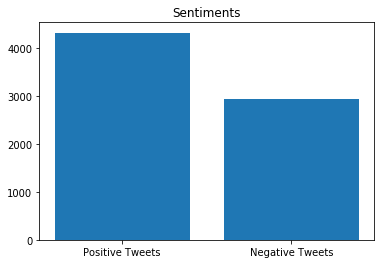

In [45]:
calculate_score_file()

### Some More Analysis
We have already installed wordcloud library to create wordcloud of frequently occuring words in our tweets file.

In [46]:
#saving all words in a positive string and a negative string to generate a word cloud 
#of frequently occuring positive and negative words respectively
positive_words = ''
negative_words = ''
for tweet in all_tweets.values():
    for word in tweet.split():
        if word in positive_set:
            positive_words += ' ' + word.strip()
        elif word in negative_set:
            negative_words += ' ' + word.strip()

#### Create Positive Word Cloud

In [47]:
positive_wordcloud = WordCloud(collocations = False, width=800, height=500, 
                               background_color="white").generate(positive_words)

#### Create Negative Word Cloud

In [48]:
negative_wordcloud = WordCloud(collocations = False, width=800, height=500, 
                               background_color="white").generate(negative_words)

#### Plot word cloud of positive words

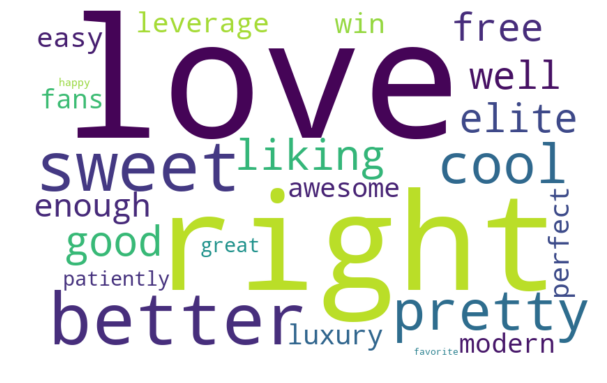

In [49]:
#Create Cloud
plt.figure(figsize=(10, 7))
#Display the cloud
plt.imshow(positive_wordcloud, interpolation="bilinear")
#Remove axis from the cloud
plt.axis('off')

plt.show()

#### Plot word cloud of negative words

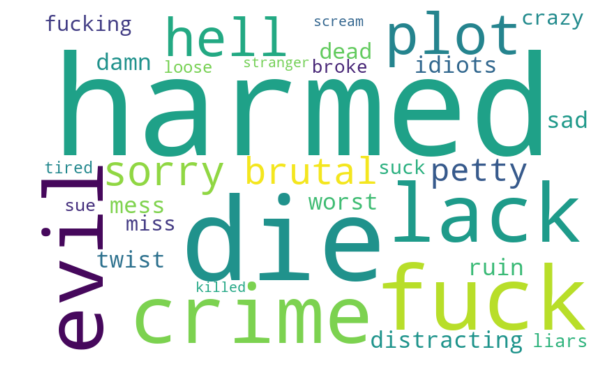

In [50]:
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()